<a href="https://www.kaggle.com/code/jackieyi/netfilx-data-cleaning-and-eda?scriptVersionId=108950302" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: #fcc307; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1.5;border-radius:15px">Netfilx Movies and TV Shows EDA and analysis🍿
</div>

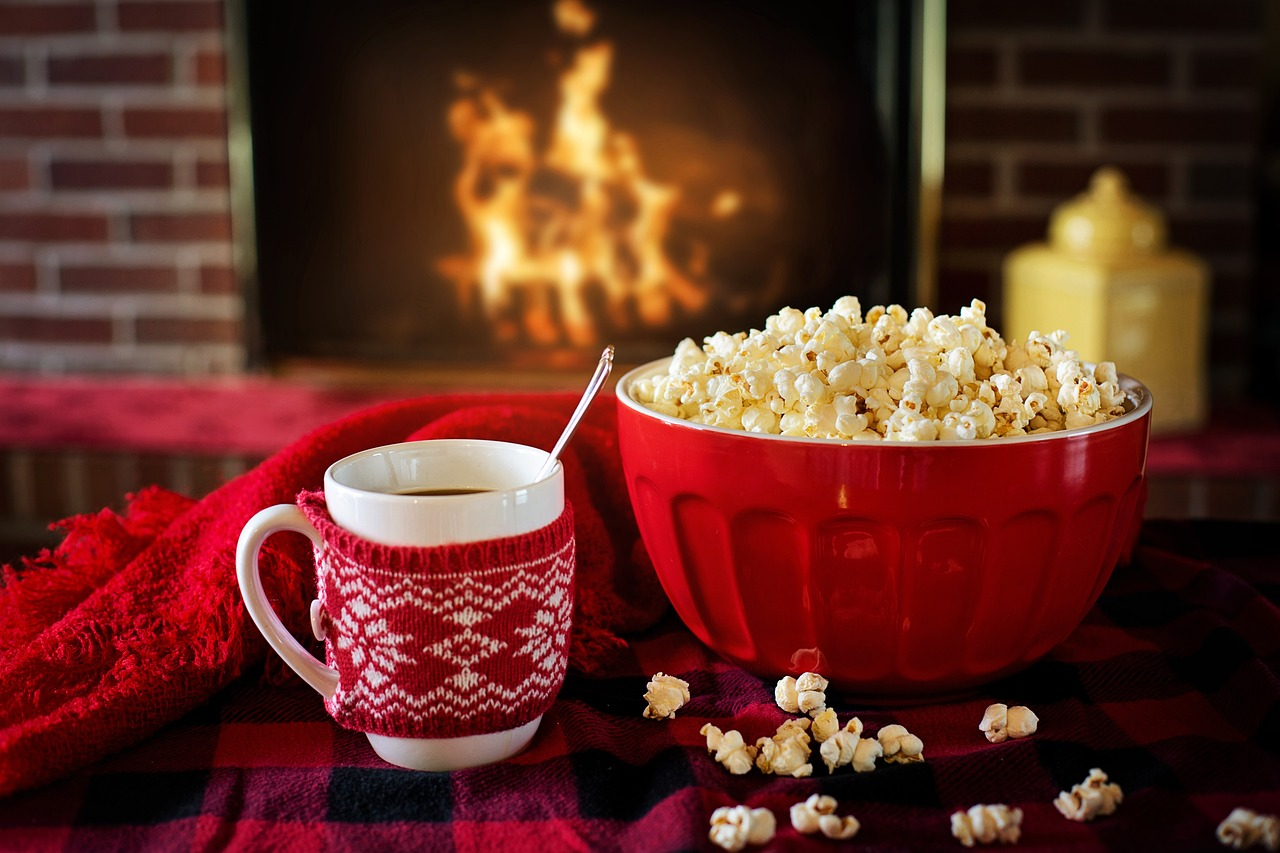
* Image from www.Pixabay.com by JillWellington

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #fbcd31; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px">Project Contents</h3>

   * [About the dataset🔢](#About)
   * [Project objective](#objective)
   * [1.Import library and data🧾](#1)
   * [2.Basic Data Cleaning🔧](#2)
   * [3.Univariate  Analysis📊](#3)
    - [3.1.Categorical Columns Analysis](#3.1)
    - [3.2.Numeric Columns Analysis](#3.2)
   * [4.Age Certification Analysis📺](#4)
   * [5.Genre Analysis🎬](#5)
   * [6. Ends🥳](#6)
    
    

<a id="About"></a>
<h3 style="text-align: left; background-color: #fbcd31; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px">About the dataset🔢
</h3>

<h4>The dataset we will use in this protect is <mark>titles.csv</mark>, which includes following 15 columns:</h4>

* <b>id</b>: The title ID on JustWatch.
* <b>title</b>: The name of the title.
* <b>show_type</b>: TV show or movie.
* <b>description</b>: A brief description.
* <b>release_year</b>: The release year.
* <b>age_certification</b>: The age certification.
* <b>runtime</b>: The length of the episode (SHOW) or movie.
* <b>genres</b>: A list of genres.
* <b>production_countries</b>: A list of countries that produced the title.
* <b>seasons</b>: Number of seasons if it's a SHOW.
* <b>imdb_id</b>: The title ID on IMDB.
* <b>imdb_score</b>: Score on IMDB.
* <b>imdb_votes</b>: Votes on IMDB.
* <b>tmdb_popularity</b>: Popularity on TMDB.
* <b>tmdb_score</b>: Score on TMDB.

<a id = "objective"></a>

<h3 style="text-align: left; background-color: #fbcd31; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px">Project objective
</h3>
<h4>The goal for this project is includes:</h4>

* <b>Data Cleaning</b>
* <b>Univariate Analysis</b>
* <b>Multivariate Analysis</b>

<a id="1"></a>
# <div style="text-align: center; background-color: #fcc307; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px">1.Import library and data🧾</div>

In [ ]:
!pip install country_converter

#Data Analysis 
import pandas as pd
from pandas import Series
import numpy as np
import country_converter as coco
import re

#Data Vis
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

#Data Vis setting
%matplotlib inline
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

#Import data
df = pd.read_csv("../input/netflix-tv-shows-and-movies/titles.csv")
df.drop(columns={"description","imdb_id","id"},inplace=True) #Drop unnecessary columns

In [ ]:
print("Shape of dataset:",df.shape)

Now,our dataset has <b>12 columns and 5850 rows.</b>

<a id="2"></a>
# <div style="text-align: center; background-color: #fcc307; font-family:Franklin Gothic; color:#1D438A; padding: 15px; line-height:1;border-radius:15px"> 2.Basic Data Cleaning🔧
</div> 

<h4>In this section, I will do basic Data Cleaning to make the dataset <mark>just good enough</mark> to use, and do more advanced Data Cleaning in other sections if needed.</h4>

In [ ]:
msno.matrix(df)
plt.title("Missing Values Matrix",fontsize=30)

<b>We can see that most of our missing values are from <mark>age_certification</mark> and <mark>seasons</mark> columns.</b>

In [ ]:
df = df[~df["title"].isnull()]

<b>The NaN in title is not recognizable, and there is only one item without a title, so I decide to directly remove it.</b>

In [ ]:
print(df["age_certification"].unique())
df["age_certification"].fillna("Not Rated",inplace=True)

<b>I checked the unique catagories in age_certification column and matched them with Netfilx age rating list, I found that the dataset include all of the age rating, and <mark>the missing values are those movies or shows that haven't been rated on the website that the data came from</mark>.</b>

In [ ]:
df[df["seasons"].isnull()]["type"].value_counts()

In [ ]:
df["type"].value_counts()

<b>I found that all of the missing values in seasons columns are actually movies, it is reasonable that movies don't have any season. Instead of keep them as NaN or drop all of them, I decided to fill them with 0.</b>

In [ ]:
df["seasons"].fillna(0,inplace=True)

In [ ]:
four_col = df[["imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]]
df[["imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]] = four_col.apply(lambda x : x.fillna(np.mean(x)))

<b>Filling the NaN values from above columns using their own average values.</b>

In [ ]:
df.isnull().sum()

<b>There is not missing value in the dataset now.</b>

<a id="3"></a>
# <div style="text-align: center; background-color: #fcc307; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px"> 3.Univariate  Analysis📊
</div>

<h4>There are two types of columns in the dataset:<mark>Categorical columns and Numerical columns</mark>. <br><br>In this section, we will explore columns and get valuable insights using data visualization. I will use <b>plotly</b>, a powerful and high-efficient package for data visualization.</h4>

<a id ="3.1"></a>

<h3 style="text-align: left; background-color: #fbcd31; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px">3.1 Categorical Columns Analysis
</h3>

<h4>There are <mark>4</mark> Categorical columns in the dataset:</h4>

* type
* age_certification
* genres
* production_countries

<h4 style="text-align: left; background-color:#fcd337; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px">3.1.1 Type
</h4>

<h4>1. What is the distribution of type?</h4>

In [ ]:
type_count = df["type"].value_counts()

type_fig = px.pie(values=type_count.values,names=type_count.index,color_discrete_sequence=px.colors.qualitative.T10,template="plotly_dark",title="Type distribution")
type_fig.update_traces(textinfo='label+percent+value')
type_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
type_fig.show()

<b>In this dataset, 36% data is Show and 64% data is Movie</b>

<h4 style="text-align: left; background-color:#fcd337; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px">3.1.2 Age certification
</h4>

<h4>1. What are the top 10 frequent age certification?</h4>

In [ ]:
age_count = df["age_certification"].value_counts()[:10]
age_fig = px.bar(y=age_count.values,x=age_count.index,text=age_count.values,title="Top 10 Age certification count",color=age_count.index,color_discrete_sequence=px.colors.qualitative.T10,template="plotly_dark")
age_fig.update_layout(xaxis_title="Age certification",yaxis_title="Count")
age_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
age_fig.show()

<b>The most frequent age certification is Not Rated, which has 2618 results, the second one is TV-MA, which is the TV Parental Guidelines signifies content for mature audiences, has 883 results. </b>

<h4 style="text-align: left; background-color:#fcd337; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px">3.1.3 Genres
</h4>

<h4>1.What are the top 10 frequent genre?</h4>

In [ ]:
df["genres"]

<b>We can see there are some shows or movies have more than one genre, counting each genre combination as a new catagory might not be a good decision, so I would like to split them into single genres and count them.</b>

In [ ]:
genreslist = list()
df.genres.str.findall(r"'(\w+?)'").map(lambda x: genreslist.extend(x))
top_10_genres = pd.Series(genreslist).value_counts()[:10]

In [ ]:
genres_fig = px.bar(y=top_10_genres.values,x=top_10_genres.index,text=top_10_genres,title="Top 10 Genres",color=top_10_genres.index,color_discrete_sequence=px.colors.qualitative.T10,template="plotly_dark")
genres_fig.update_layout(xaxis_title="Genre",yaxis_title="Count")
genres_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
genres_fig.show()

<h4 style="text-align: left; background-color:#fcd337; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px">3.1.4 Production Countries
</h4>

<h4>I used the same counting method for the production_countries columns. When I was processing the data, I found and solved two problems:</h4>

1. There is a category called <mark>Lebanon</mark>, which is inconsistent with the other 2 digits country codes, so I replaced it with LB.
2. There are 2 country codes that can not be found: <mark>SU and XX</mark>. I dropped their data in case of failure to visualize the world map below.

<h4>What is the count of each country?</h4>

In [ ]:
country_list = list()
df.production_countries.str.findall(r"'(\w+?)'").map(lambda x: country_list.extend(x))

country_list = pd.Series(country_list).replace("Lebanon","LB")
country_list = country_list.value_counts()
country_list = country_list.drop(index=["SU","XX"])

In [ ]:
country_list.index = coco.convert(names=country_list.index, to="ISO3") 

fig = px.choropleth(locations=country_list.index,
                    color=country_list.values,
                    color_discrete_sequence=px.colors.qualitative.T10,
                    template='plotly_dark',
                    title = 'Production Countries Distribution Map')
fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))
fig.show()

<b>As the world map shows above, it obvious to find that the United States has the darkest color, which means, for this dataset,  the United States produces the most of shows and movies.</b>

<a id = "3.2"></a>

<h3 style="text-align: left; background-color: #fbcd31; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px">3.2.Numeric Columns Analysis
</h3>

<h4>There are <mark>7</mark> Numeric columns in the dataset:</h4>

* release_year
* seasons
* runtime
* imdb_score
* imdb_votes
* tmdb_popularity
* tmdb_score

<h4 style="text-align: left; background-color:#fcd337; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px">3.2.1 Release Year
</h4>

In [ ]:
year_df = df.groupby("type")["release_year"].apply(list)
Year_label = ["Type: Movie","Type: Show"]
color = ["yellow","red"]

year_fig = ff.create_distplot(year_df,Year_label,colors=color,show_hist=False)
year_fig.layout.template = "plotly_dark"
year_fig.update_layout(title="Runtime Distribution",font=dict(size = 13,family="Franklin Gothic"))
year_fig.update_layout(xaxis_title="Runtime",yaxis_title="Density")
year_fig.show()

<b>Most of the shows in the dataset relased around the second half of 2019, and most of the movies released around the first half of 2019.</b>

<h4 style="text-align: left; background-color:#fcd337; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px">3.2.2 Seasons : Show
</h4>

In [ ]:
seasons_fig = px.box(y=df[df["type"]=="SHOW"]["seasons"],template= 'plotly_dark', title = 'Shows Season Analysis(Boxplot)')
seasons_fig.update_layout(font = dict(size= 15, family="Franklin Gothic"))

In [ ]:
df[df['seasons']==42]

<b>I would like to analyze the season for shows because movies don't have actual season value, even though I assigned them value of 0.<br><br>The boxplot shows that most of shows only have 1 season, but there is one show have 42 seasons, which is a show called  Survivor.</b>

<h4 style="text-align: left; background-color:#fcd337; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px">3.2.3 Runtime
</h4>

In [ ]:
runtime_df = df.groupby("type")["runtime"].apply(list)

runtime_label = ["Type: Movie","Type: Show"]
color = ["yellow","red"]

runtime_fig = ff.create_distplot(runtime_df,runtime_label,colors=color,show_hist=False)
runtime_fig.layout.template = "plotly_dark"
runtime_fig.update_layout(font = dict(size = 15,family="Franklin Gothic"))
runtime_fig.update_layout(title="Runtime Distribution" ,xaxis_title="Runtime",yaxis_title="Density")
runtime_fig.show()

<b>For movies, the most common runtime is around 96 mins. For shows, the most common runtime is around 45 mins.</b>

<a id="4"></a>
# <div style="text-align: center; background-color: #fcc307; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px"> 4.Age Certification Analysis📺
</div>

<h4>From this section, I will use <mark>different combinations of features</mark> to do the analysis and get more in-depth insights.</h4>

<h4>1. What is the average runtime of each type by age certification?</h4>


In [ ]:
mean_movie_runtime = df.groupby(["type","age_certification"])["runtime"].agg(np.mean).round(0).sort_values(ascending=False)

In [ ]:
runtime_age_fig = go.Figure(data=
[go.Bar(name="Movie",x=mean_movie_runtime["MOVIE"].index,y=mean_movie_runtime["MOVIE"].values,text=mean_movie_runtime["MOVIE"].values),
go.Bar(name="Show",x=mean_movie_runtime["SHOW"].index,y=mean_movie_runtime["SHOW"].values,text=mean_movie_runtime["SHOW"].values)])
runtime_age_fig.update_layout(title="Average runtime by type and age certification",xaxis_tickangle=45,xaxis_title="Age certification",yaxis_title="Average Runtime")
runtime_age_fig.layout.template = "plotly_dark"
runtime_age_fig.update_layout(font=dict(size = 15,family="Franklin Gothic"))
runtime_age_fig.show()

* <b>For movies, the age certification of <mark>PG-13</mark> has the highest average runtime of <mark>107 mins</mark>, the age certification of <mark>G</mark> has the lowest average runtime of <mark>89 mins</mark>.</b>
* <b>For shows, the age certification of <mark>TV-MA</mark> has the highest average runtime of <mark>43 mins</mark>, the age certification of <mark>TV-Y</mark> has the lowest average runtime of <mark>17 mins</mark>.</b>

<a id="5"></a>
# <div style="text-align: center; background-color: #fcc307; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px"> 5.Genre Analysis🎬
</div>

<h4>1. What is the most and least frequency genres of each type?</h4>

<b>I will do Data Cleaning to make the dataframe avaliable for this analysis. <mark>You might skip the Data Cleaning part and watch the data visualization below if you want!</mark>.</b>

In [ ]:
from functools import reduce
genresdummylist = df.genres.str.extractall(r"'(\w+)'").unstack()
dummylist = list()
for i in genresdummylist.columns:
    dummylist.append(pd.get_dummies(genresdummylist[i]))

dummy = reduce(lambda x, y: x.add(y, fill_value=0), dummylist).astype(int)
df = pd.merge(df, dummy, left_index=True, right_index=True)

In [ ]:
type_genres_count = df[list(dummy.columns)].groupby(df['type']).sum()
type_genres_count

In [ ]:
type_genres_fig = go.Figure(data=
[go.Bar(name="Movie",x=type_genres_count.loc["MOVIE"].index,y=type_genres_count.loc["MOVIE"].values,text=type_genres_count.loc["MOVIE"].values),
go.Bar(name="Show",x=type_genres_count.loc["SHOW"].index,y=type_genres_count.loc["SHOW"].values,text=type_genres_count.loc["SHOW"].values)])
type_genres_fig.update_layout(title="Frequency of genres by type",xaxis_tickangle=45,xaxis_title="Genres",yaxis_title="Frequency")
type_genres_fig.layout.template = "plotly_dark"
type_genres_fig.update_layout(font=dict(size = 15,family="Franklin Gothic"))
type_genres_fig.update_layout(barmode="stack",xaxis_categoryorder="total descending")
type_genres_fig.show()

* <b><mark>The most frequency of genre for both movie and show is drama</mark>, there are 1092 shows and 1876 movies include the genre of drama. The least frequency one is western, only 13 and 28 movies include the genre of western.</b>

<a id="6"></a> 

# <div style="text-align: center; background-color: #fcc307; font-family:Franklin Gothic; color: #1D438A; padding: 15px; line-height:1;border-radius:15px"> 6. Ends🥳
</div>
<b>Thanks for watching my data science project! <mark>I would like to get feedback from you!</mark> If you have any ideas or suggestions, please comment and let me know! Thank you so much!</b>